# Feature Engineering

### Context:
    
The dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, 
each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to 
the set of attributes. The link to the dataset can be found below.

### Dataset:
https://www.kaggle.com/renaldydermawan25/credit-data/version/1


### Attribute information:
    
Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


### Objective:
    
To Guage Feature Importance

In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Input dataset

df_pre = pd.read_csv("credit_data.csv")

Shape=df_pre.shape

print("Rows:",Shape[0])
print("Columns:",Shape[1])

df_pre.head(2)

Rows: 1000
Rows: 21


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


In [3]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [4]:
# Randomly select 50% data for this use case

from sklearn.model_selection import train_test_split

out_data,df =train_test_split(df_pre, train_size = 0.5,random_state=5)

Shape=df.shape

print("Rows:",Shape[0])
print("Columns:",Shape[1])

df.columns

df.head(2)

Rows: 500
Rows: 21


Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
544,0,no checking account,12,critical account/ other credits existing (not ...,car (new),1255,... < 100 DM,.. >= 7 years,4,male : single,...,4,real estate,61,none,own,2,unskilled - resident,1,none,yes
515,0,< 0 DM,6,critical account/ other credits existing (not ...,car (new),609,... < 100 DM,4 <= ... < 7 years,4,female : divorced/separated/married,...,3,if not A121 : building society savings agreeme...,37,none,own,2,skilled employee / official,1,none,no


In [5]:
# Build Ensemble model but need to modify the dataset first
# Just visualise
obj_df=df.select_dtypes(include=['object'])
obj_df.head(2)

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
544,no checking account,critical account/ other credits existing (not ...,car (new),... < 100 DM,.. >= 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
515,< 0 DM,critical account/ other credits existing (not ...,car (new),... < 100 DM,4 <= ... < 7 years,female : divorced/separated/married,none,if not A121 : building society savings agreeme...,none,own,skilled employee / official,none,no


In [6]:
dff=pd.get_dummies(df, columns=['account_check_status','credit_history','purpose','savings',
       'present_emp_since','personal_status_sex', 'other_debtors','property','other_installment_plans', 
       'housing','job','foreign_worker'])

Shape=dff.shape

print("Rows:",Shape[0])
print("Columns:",Shape[1])


dff.head(2)

Rows: 500
Rows: 61


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,telephone,account_check_status_0 <= ... < 200 DM,...,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,foreign_worker_no,foreign_worker_yes
544,0,12,1255,4,4,61,2,1,none,0,...,0,0,1,0,0,0,0,1,0,1
515,0,6,609,4,3,37,2,1,none,0,...,0,0,1,0,0,1,0,0,1,0


In [7]:
# Lets check for highly correlated variables

cor= dff.corr()
cor.loc[:,:] = np.tril(cor,k=-1)  # reference:https://www.geeksforgeeks.org/numpy-tril-python/
cor=cor.stack()
cor[(cor > 0.55) | (cor< -0.55)]

credit_amount                                            duration_in_month                                                             0.583234
credit_history_existing credits paid back duly till now  credit_history_critical account/ other credits existing (not at this bank)   -0.670328
savings_unknown/ no savings account                      savings_... < 100 DM                                                         -0.609828
personal_status_sex_male : single                        personal_status_sex_female : divorced/separated/married                      -0.766802
other_debtors_none                                       other_debtors_co-applicant                                                   -0.678394
                                                         other_debtors_guarantor                                                      -0.690725
other_installment_plans_none                             other_installment_plans_bank                                                 -0

In [8]:
#Drop irrelavent data
dff=dff.drop(["telephone","foreign_worker_yes","job_unskilled - resident","housing_rent",
              "other_installment_plans_bank",
              "other_debtors_co-applicant"],axis=1)

In [9]:
# Target imbalance
Target_Imb=dff["default"].value_counts(normalize=True)
if Target_Imb[0]>0.65:
    print("Target imbalance exists")

Target_Imb

Target imbalance exists


0    0.726
1    0.274
Name: default, dtype: float64

In [10]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = dff['default']
X = dff.loc[:, dff.columns != 'default']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 54), (150, 54), (350,), (150,))

In [11]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfm=rf.fit(X_train, y_train)

preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(y_test, y_pred)

RF_Accuracy=np.around(accuracy_score(y_test, y_pred)*100)
print("Accuracy:",np.around(accuracy_score(y_test, y_pred)*100),"%")

array([[95,  1],
       [42, 12]])

Accuracy: 71.0 %


In [12]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = dff.columns[:]
features= a.drop('default',1)

imp=rf.feature_importances_
imp_sort=np.sort(imp)

print (pd.DataFrame(imp_sort, columns = ["Imp"], index = X_train.columns))




                                                         Imp
duration_in_month                                   0.000472
credit_amount                                       0.000840
installment_as_income_perc                          0.000914
present_res_since                                   0.001637
age                                                 0.002962
credits_this_bank                                   0.004764
people_under_maintenance                            0.005266
account_check_status_0 <= ... < 200 DM              0.005689
account_check_status_< 0 DM                         0.005968
account_check_status_>= 200 DM / salary assignm...  0.006110
account_check_status_no checking account            0.007207
credit_history_all credits at this bank paid ba...  0.007952
credit_history_critical account/ other credits ...  0.008168
credit_history_delay in paying off in the past      0.008234
credit_history_existing credits paid back duly ...  0.008475
credit_history_no credit

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

(<Figure size 720x540 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x106773e80>)

<BarContainer object of 15 artists>

([<matplotlib.axis.YTick at 0x10678d4e0>,
 <a list of 15 Text yticklabel objects>)

Text(0.5, 0, 'Relative Importance')

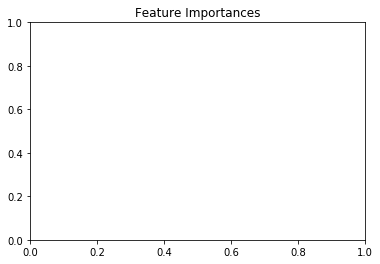

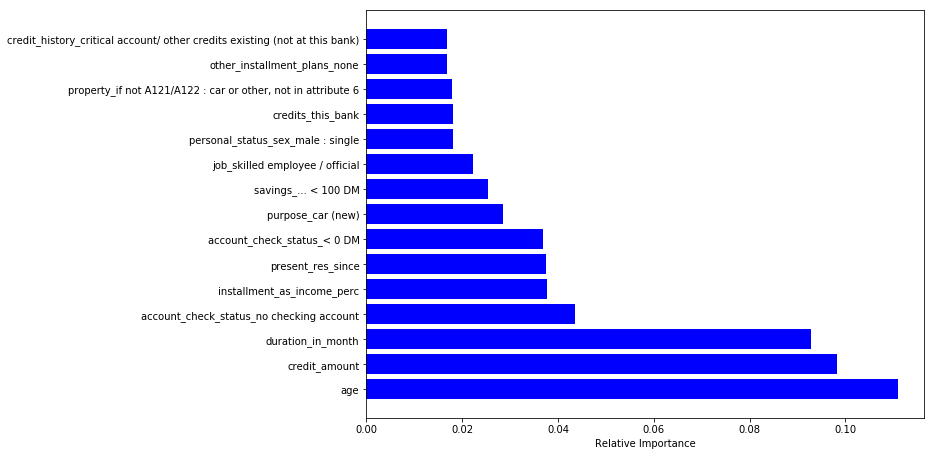

In [13]:
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.subplots(figsize=(10,7.5))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [14]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)

print("Train Accuracy:", np.around(trainResult*100),"%\n")

print("Test Accuracy:",np.around(testResult*100),"%\n")

print("Accuracy abnormality:",np.around(trainResult*100-testResult*100),"%")

Train Accuracy: 100.0 %

Test Accuracy: 71.0 %

Accuracy abnormality: 29.0 %


## K-fold cross-validation

k-fold cross validation(without stratification)

Usually k is set as 10-20 in practical settings, depends on data set size

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 77

In [16]:
kfold = KFold(n_splits=num_folds, random_state=seed)

# rfm = fit on training
results = cross_val_score(rfm,X, y, cv=kfold)

Kfold_CV=np.around(np.mean(abs(results*100)))

for i in range(num_folds):
    print("Kfold",i,":",results[i]*100,"%\n")

print("Mean:",Kfold_CV,"%")

print("\nStandard Deviation:",results.std())

print("\n\nRandom Forest Accuracy",RF_Accuracy,"%\n\n")

improvement=Kfold_CV-RF_Accuracy
print("Accuracy improvement:",np.around(improvement),"%")





Kfold 0 : 70.0 %

Kfold 1 : 76.0 %

Kfold 2 : 76.0 %

Kfold 3 : 86.0 %

Kfold 4 : 80.0 %

Kfold 5 : 78.0 %

Kfold 6 : 82.0 %

Kfold 7 : 80.0 %

Kfold 8 : 68.0 %

Kfold 9 : 78.0 %

Mean: 77.0 %

Standard Deviation: 0.05063595560468864


Random Forest Accuracy 71.0 %


Accuracy improvement: 6.0 %


## Leave One Out Cross-Validation

In [17]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [18]:
# You Will do it on X_train, y_train to save time. It will take too much time, hence not recommended for bigger data
scores = cross_val_score(rfm, X_train, y_train, cv=LeaveOneOut())
scores

array([0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Because we have 350 samples, the leave one out cross-validation yields scores for 350 trials, and the score indicates either 
defaulter (1.0) or non-defaulter (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [19]:
print("Mean accuracy:",scores.mean()*100,"%")

print("\nRandom Forest Accuracy",RF_Accuracy,"%")

print("\nStandard Deviation:",scores.std())

Leave_One_Out=np.mean(abs(scores.mean()*100))
improvement=Leave_One_Out-RF_Accuracy
print("\nAccuracy improvement:",np.around(improvement),"%")


Mean accuracy: 78.0 %

Random Forest Accuracy 71.0 %

Standard Deviation: 0.4142463035441596

Accuracy improvement: 7.0 %


# Stratified cross-validation

k-fold cross validation with stratification

In [21]:

from sklearn.model_selection  import StratifiedKFold, cross_val_score

k = 10

stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55)
results = cross_val_score(rfm, X, y, cv = stratified_kfold)

strat_CV=np.around(np.mean(abs(results*100)))

for i in range(k):
    print("Kfold",i,":",results[i]*100,"%\n")

print("\n\nMean:",strat_CV,"%")

print("\nStandard Deviation:",results.std())

print("\n\nRandom Forest Accuracy",RF_Accuracy,"%\n\n")

improvement=strat_CV-RF_Accuracy
print("Accuracy improvement:",np.around(improvement),"%")



Kfold 0 : 76.47058823529412 %

Kfold 1 : 80.3921568627451 %

Kfold 2 : 78.43137254901961 %

Kfold 3 : 80.0 %

Kfold 4 : 80.0 %

Kfold 5 : 78.0 %

Kfold 6 : 78.0 %

Kfold 7 : 77.55102040816327 %

Kfold 8 : 73.46938775510205 %

Kfold 9 : 77.55102040816327 %



Mean: 78.0 %

Standard Deviation: 0.01928092372203721


Random Forest Accuracy 71.0 %


Accuracy improvement: 7.0 %


# Bootstrapping ( Bonus)

Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data 
(with/without replacement)

Create a model with each bootstrap sample and validate it with the test set

Final result is calculated by averaging the accuracy of models

In [26]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)
    
accuracy = np.array(accuracy)

print('Standard deviation: ', accuracy.std())

Boot=np.around(accuracy.mean()*100)

print("\n\nMean:",Boot,"%")

print("\nStandard Deviation:",accuracy.std())

print("\n\nRandom Forest Accuracy",RF_Accuracy,"%\n\n")

improvement=Boot-RF_Accuracy
print("Accuracy improvement:",np.around(improvement),"%")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

Standard deviation:  0.02023198787399133


Mean: 69.0 %

Standard Deviation: 0.02023198787399133


Random Forest Accuracy 71.0 %


Accuracy improvement: -2.0 %


# Model Tuning using hyper parameters

In [28]:
#pretty print

from pprint import pprint
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


# RandomSearchCV

In [30]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [32]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.4s finished


In [33]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': True}

In [35]:
best_random = rf_random.best_estimator_

print("Random sarch CV Score:",Rand_search_cv,"%")

print("\n\nRandom Forest Accuracy",RF_Accuracy,"%\n\n")

Rand_search_cv=np.around(best_random.score(X_test , y_test)*100)

improvement=Rand_search_cv-RF_Accuracy
print("Accuracy improvement:",np.around(improvement),"%")

Random sarch CV Score: 15.0 %


Random Forest Accuracy 71.0 %


Accuracy improvement: -56.0 %


# GridSearcCV

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

rf = RandomForestRegressor(random_state = 1)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X_train, y_train);

grid_search.best_params_

/Users/krishnavdave/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [5, 6], 'max_features': [2, 3], 'min_samples_leaf': [3, 4], 'min_samples_split': [5, 10], 'n_estimators': [5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 7}

In [39]:
best_grid = grid_search.best_estimator_

Grid_search_cv=np.around(best_grid.score(X_test, y_test)*100)
print("Grid sarch CV Score:",Grid_search_cv,"%")

print("\n\nRandom Forest Accuracy",RF_Accuracy,"%\n\n")

improvement=Grid_search_cv-RF_Accuracy
print("Accuracy improvement:",np.around(improvement),"%")



Random sarch CV Score: 7.0 %


Random Forest Accuracy 71.0 %


Accuracy improvement: -64.0 %


In [40]:
print("Randon Forest Accuracy:", RF_Accuracy,"%")

print("\nK Fold:", Kfold_CV,"%")

print("\nLeave one Out:", Leave_One_Out,"%")

print("\nStratified CV:", strat_CV,"%")

print("\nBootstrapping:", Boot,"%")

print("\nRandom sarch CV:",Rand_search_cv,"%")

print("\nRandom sarch CV Score:",Grid_search_cv,"%")


Randon Forest Accuracy: 71.0 %

K Fold: 77.0 %

Leave one Out: 78.0 %

Stratified CV: 78.0 %

Bootstrapping: 69.0 %

Random sarch CV: 15.0 %

Random sarch CV Score: 7.0 %


In [48]:
Models=["Randon Forest","K fold","Leave One Out","Stratified CV","Random Search CV","Grid Search CV"]
Best=[RF_Accuracy,Kfold_CV,Leave_One_Out,strat_CV,Boot,Rand_search_cv,Grid_search_cv]
Best=np.array(Best)

In [49]:
best=Best.argmax()
print("Best model is:",Models[best])

Best model is: Leave One Out
